In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from fbprophet import Prophet

In [2]:
plt.rcParams['figure.figsize'] = (20,10)

In [3]:
import os

data_dir = '/Users/jsiska3/Uceni/Deep_Learning/deep-learning-with-python-notebooks-master/Data/'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

data = pd.read_csv(fname, index_col=0, parse_dates=True)

In [4]:
data.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [5]:
data.index

DatetimeIndex(['2009-01-01 00:10:00', '2009-01-01 00:20:00',
               '2009-01-01 00:30:00', '2009-01-01 00:40:00',
               '2009-01-01 00:50:00', '2009-01-01 01:00:00',
               '2009-01-01 01:10:00', '2009-01-01 01:20:00',
               '2009-01-01 01:30:00', '2009-01-01 01:40:00',
               ...
               '2016-12-31 22:30:00', '2016-12-31 22:40:00',
               '2016-12-31 22:50:00', '2016-12-31 23:00:00',
               '2016-12-31 23:10:00', '2016-12-31 23:20:00',
               '2016-12-31 23:30:00', '2016-12-31 23:40:00',
               '2016-12-31 23:50:00', '2017-01-01 00:00:00'],
              dtype='datetime64[ns]', name='Date Time', length=420551, freq=None)

In [62]:
df = data[['T (degC)']]

In [63]:
df = df.resample('H', closed='right').last()

In [64]:
df.reset_index(inplace=True)

In [65]:
df.columns = ['ds','y']

In [36]:
df['ds'].shape

(70128,)

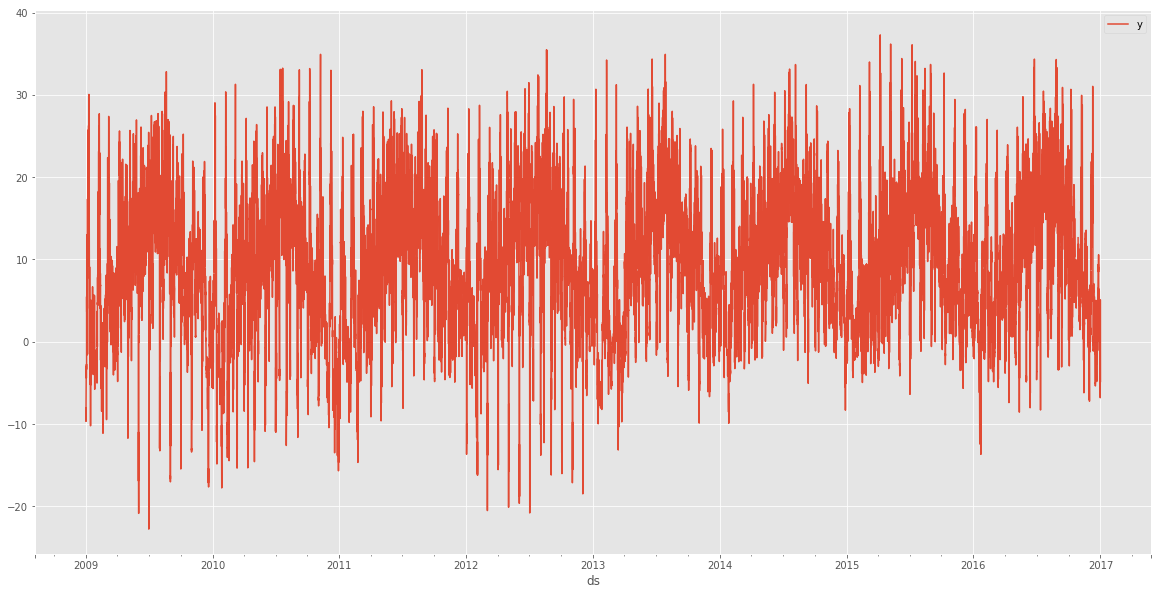

In [11]:
df.set_index('ds').plot()

In [88]:
train = df[:1000]

In [17]:
test = df[50001:]

In [18]:
test.shape

(20127, 2)

In [89]:
ml = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.05)
ml.fit(train)

/Users/jsiska3/anaconda/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [90]:
future1 = ml.make_future_dataframe(periods=300, freq='H')

In [42]:
future1.tail()

,ds
70122,2016-12-31 18:00:00
70123,2016-12-31 19:00:00
70124,2016-12-31 20:00:00
70125,2016-12-31 21:00:00
70126,2016-12-31 22:00:00


In [91]:
forecast1 = ml.predict(future1)

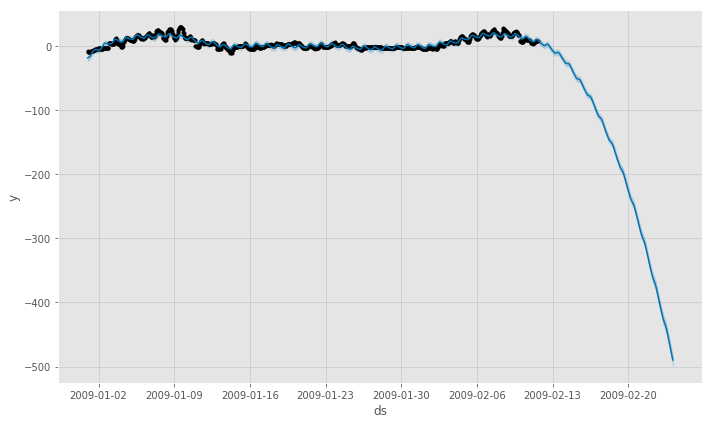

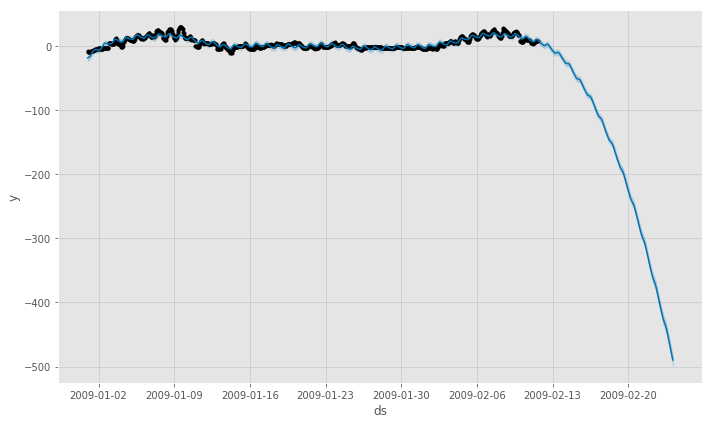

In [92]:
ml.plot(forecast1)

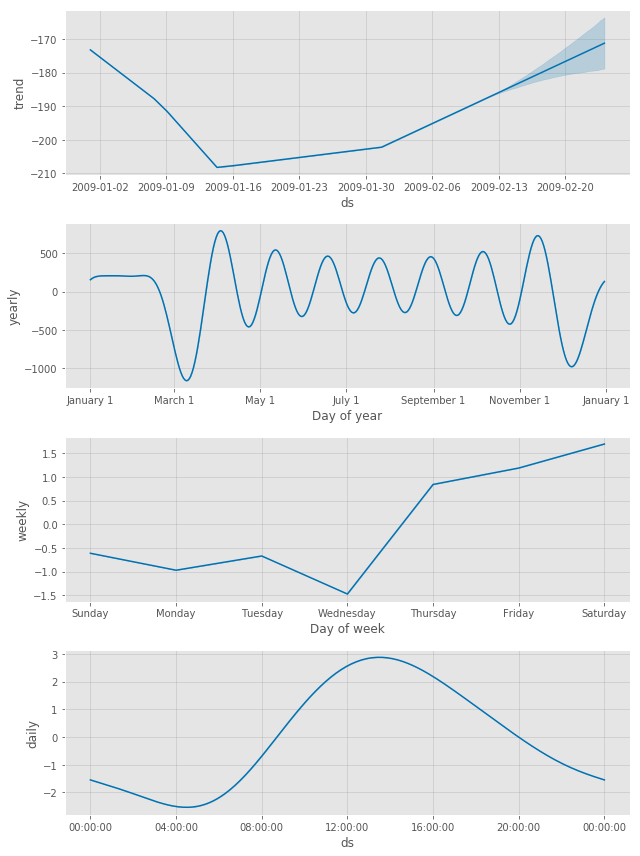

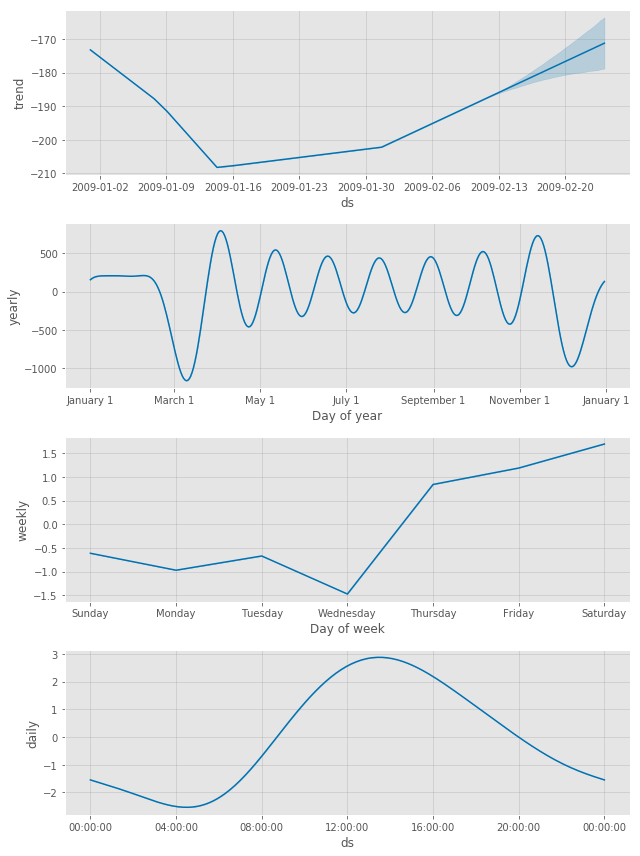

In [93]:
ml.plot_components(forecast1)

In [58]:
ml.plot_forecast_component(forecast1)

TypeError: plot_forecast_component() missing 1 required positional argument: 'name'

In [45]:
train.set_index('ds', inplace=True)
forecast1.set_index('ds', inplace=True)

In [46]:
df.set_index('ds', inplace=True)

In [47]:
viz_df = df.join(forecast1[['yhat', 'yhat_lower', 'yhat_upper']], how='outer')

In [48]:
viz_df.head()

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2009-01-01 00:00:00,-8.05,3.108752,-5.944030,12.170790
2009-01-01 01:00:00,-8.88,2.730391,-6.587877,11.333584
2009-01-01 02:00:00,-8.81,2.392514,-6.171761,11.470678
2009-01-01 03:00:00,-9.05,2.116469,-7.032884,10.588551
2009-01-01 04:00:00,-9.63,1.980585,-7.122370,11.256495


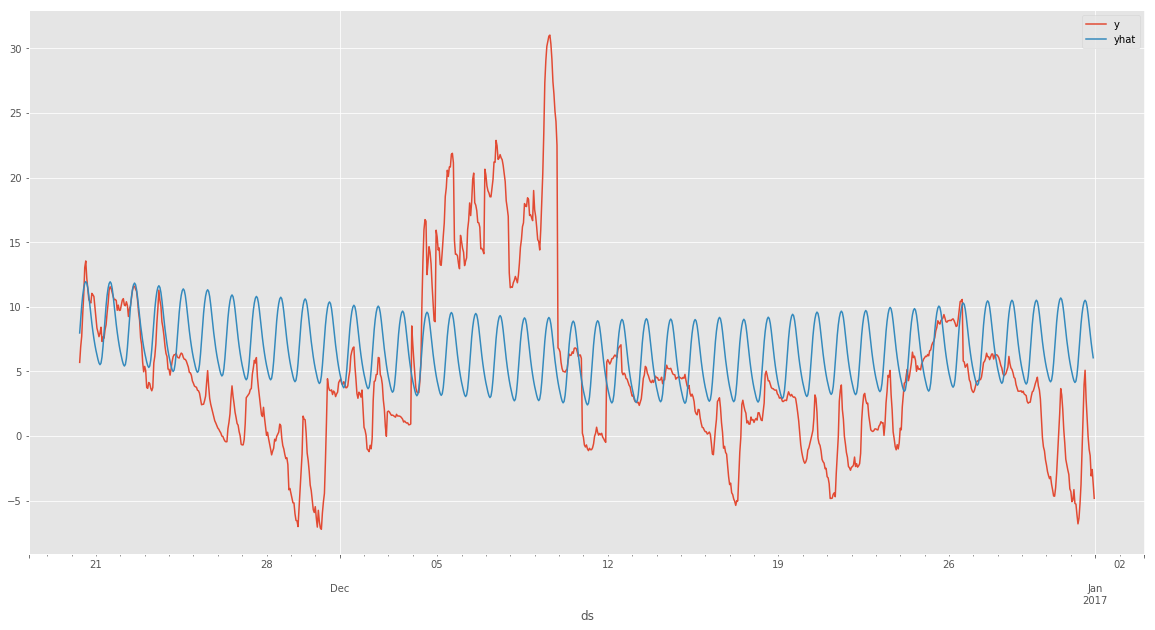

In [49]:
viz_df[['y', 'yhat']][-1000:].plot()